### Feature Extraction

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd

In [6]:
# Reading data from noshow_processed_data_latest.csv file / index_col = 0 to avoid duplication of index
df = pd.read_csv("noshow_processed_data_latest.csv", index_col = 0)
df.sample(5)

,PatientId,Gender,BookingDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,NoShow,YearBookingDate,MonthBookingDate,DayBookingDate,YearAppointmentDate,MonthAppointmentDate,DayAppointmentDate,HourOfDayBooking,DaysToAppointment,AppointmentWeekDay
94684,142128531969697,1,2016-06-06,2016-06-07,20,44,1,0,0,0,...,0,2016,6,6,2016,6,7,0,1,1
89254,19942287121372,0,2016-05-20,2016-06-08,49,11,1,1,0,0,...,0,2016,5,20,2016,6,8,0,19,2
1563,3246667658624,0,2016-04-11,2016-04-29,9,62,0,0,0,0,...,0,2016,4,11,2016,4,29,0,18,4
16314,475678924863591,1,2016-05-12,2016-05-17,22,37,0,0,0,0,...,0,2016,5,12,2016,5,17,0,5,1
89097,749362329888258,1,2016-04-25,2016-06-02,62,5,0,1,0,1,...,1,2016,4,25,2016,6,2,0,38,3


### Sum of total nowshows per PatientId

In [7]:
df_noshow_sum = df.groupby('PatientId')['NoShow'].sum().reset_index().rename(columns={'NoShow': 'NoShowTotalSum',})
df_noshow_sum

,PatientId,NoShowTotalSum
0,39217,0
1,43741,0
2,93779,0
3,141724,0
4,537615,0
...,...,...
62293,999931985292928,0
62294,999934989273974,0
62295,999946536742891,0
62296,999968578354866,0


In [8]:
mapping = dict(df_noshow_sum[['PatientId','NoShowTotalSum']].values)
mapping

{39217: 0,
 43741: 0,
 93779: 0,
 141724: 0,
 537615: 0,
 5628261: 1,
 11831856: 0,
 22638656: 0,
 52168938: 0,
 54223998: 0,
 61433777: 0,
 62497926: 0,
 64851211: 1,
 78385479: 0,
 79228495: 0,
 86584742: 0,
 87996454: 1,
 95313115: 0,
 99512431: 0,
 122451254: 2,
 132818181: 0,
 142133299: 1,
 156223164: 0,
 178168233: 0,
 179874775: 1,
 188964456: 0,
 211124677: 0,
 215778678: 1,
 223798575: 0,
 226438321: 0,
 243921212: 0,
 251541539: 1,
 253866521: 0,
 264963387: 0,
 269919126: 0,
 274297149: 0,
 318339487: 0,
 318385314: 0,
 319947764: 0,
 339497234: 0,
 342478778: 1,
 342954879: 0,
 355744126: 1,
 375356946: 0,
 411777183: 1,
 416673345: 0,
 422861257: 0,
 427962175: 0,
 428834933: 0,
 481543533: 0,
 483277945: 1,
 483788842: 0,
 486736716: 1,
 499112419: 0,
 499252831: 1,
 522584745: 3,
 522886422: 1,
 529485485: 0,
 555199469: 0,
 557358235: 0,
 564947796: 0,
 571943573: 0,
 573397883: 1,
 575362723: 1,
 579721997: 0,
 589194383: 1,
 595835262: 0,
 646957869: 1,
 661337357: 0

In [9]:
df['NoShowTotalSum'] = df['PatientId'].map(mapping)
df

,PatientId,Gender,BookingDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,YearBookingDate,MonthBookingDate,DayBookingDate,YearAppointmentDate,MonthAppointmentDate,DayAppointmentDate,HourOfDayBooking,DaysToAppointment,AppointmentWeekDay,NoShowTotalSum
0,29872499824296,0,2016-04-29,2016-04-29,62,0,0,1,0,0,...,2016,4,29,2016,4,29,0,0,4,0
1,558997776694438,1,2016-04-29,2016-04-29,56,0,0,0,0,0,...,2016,4,29,2016,4,29,0,0,4,0
2,4262962299951,0,2016-04-29,2016-04-29,62,1,0,0,0,0,...,2016,4,29,2016,4,29,0,0,4,0
3,867951213174,0,2016-04-29,2016-04-29,8,2,0,0,0,0,...,2016,4,29,2016,4,29,0,0,4,1
4,8841186448183,0,2016-04-29,2016-04-29,56,0,0,1,1,0,...,2016,4,29,2016,4,29,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,0,2016-05-03,2016-06-07,56,22,0,0,0,0,...,2016,5,3,2016,6,7,0,35,1,1
110523,3596266328735,0,2016-05-03,2016-06-07,51,22,0,0,0,0,...,2016,5,3,2016,6,7,0,35,1,1
110524,15576631729893,0,2016-04-27,2016-06-07,21,22,0,0,0,0,...,2016,4,27,2016,6,7,0,41,1,0
110525,92134931435557,0,2016-04-27,2016-06-07,38,22,0,0,0,0,...,2016,4,27,2016,6,7,0,41,1,0


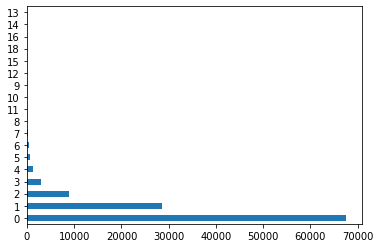

In [100]:
df['NoShowTotalSum'].value_counts().sort_values(ascending=False).plot(kind = 'barh')

In [102]:
df['NoShowTotalSum'].value_counts() # 2+ cancellations = 1 as someone who cancels "often" --> to binary col

0     67490
1     28508
2      8971
3      2923
4      1215
5       552
6       337
7       161
8       114
11       65
10       50
9        31
12       23
15       20
18       18
16       16
14       14
13       13
Name: NoShowTotalSum, dtype: int64

### Percentage of cancelled visits

In [104]:
mapping = df.PatientId.value_counts().to_dict()
mapping

{822145925426128: 88,
 99637671331: 84,
 26886125921145: 70,
 33534783483176: 65,
 871374938638855: 62,
 6264198675331: 62,
 258424392677: 62,
 75797461494159: 62,
 66844879846766: 57,
 872278549442: 55,
 89239687393655: 54,
 8435223536: 51,
 853439686798559: 50,
 14479974122994: 46,
 65433599726992: 46,
 9452745294842: 42,
 81894521843749: 42,
 188232341789524: 40,
 2271579924275: 38,
 9496196639835: 38,
 13364929297498: 37,
 1484143378533: 35,
 986162815579582: 34,
 88834999836575: 34,
 712458866975343: 33,
 6128878448536: 30,
 416755661551767: 30,
 81213966782532: 29,
 8634164126317: 24,
 36994987339512: 23,
 1198157171975: 23,
 37994336685892: 22,
 725983755516: 21,
 17798942295934: 21,
 496777386375: 21,
 6383698598534: 20,
 9715135545613: 20,
 54376659453918: 20,
 38899547972932: 20,
 787697428886813: 20,
 32351482915: 20,
 69322187574939: 20,
 5587789811398: 20,
 27452363761854: 19,
 46784193141591: 19,
 76753491299519: 19,
 6285945381692: 19,
 237853853551: 19,
 579448128831: 1

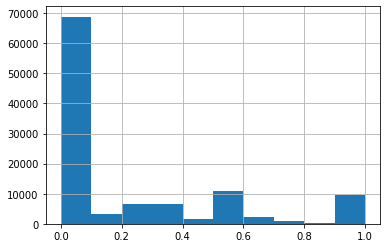

In [77]:
# total visits

mapping = df.PatientId.value_counts().to_dict()

df['TotalVisits'] = df['PatientId'].map(mapping)

df['PercentageOfCalncelation'] = np.round(df['NoShowTotalSum']/df['TotalVisits'],2)

df['PercentageOfCalncelation'].hist()

### Distance to the holiday: brasilian holidays in 2016
Which holidays to account for, only national or add religion based ones?   Catholicism (64.6%) / Protestantism (22.2%)

National: https://www.officeholidays.com/countries/brazil/2016

### Hour of the day for the appointment

There is no hourly data for the appointment itself, just for the appointment booking.

### Average NoShows (cancellations) per Neighbourhood

In [83]:
df_noshow_loc_sum = df.groupby('Neighbourhood')['NoShow'].sum().reset_index().rename(columns={'NoShow': 'NoShowLocationTotalSum',})

mapping = dict(df_noshow_loc_sum[['Neighbourhood','NoShowLocationTotalSum']].values)

df['NoShowLocationTotalSum'] = df['Neighbourhood'].map(mapping)
df

,PatientId,Gender,BookingDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,MonthAppointmentDate,DayAppointmentDate,HourOfDayBooking,DaysToAppointment,AppointmentWeekDay,NoShowTotalSum,NumberOfVisits,TotalVisits,PercentageOfCalncelation,NoShowLocationTotalSum
0,29872499824296,0,2016-04-29,2016-04-29,62,0,0,1,0,0,...,4,29,0,0,4,0,NaN,2,0.00,631
1,558997776694438,1,2016-04-29,2016-04-29,56,0,0,0,0,0,...,4,29,0,0,4,0,NaN,2,0.00,631
2,4262962299951,0,2016-04-29,2016-04-29,62,1,0,0,0,0,...,4,29,0,0,4,0,NaN,2,0.00,110
3,867951213174,0,2016-04-29,2016-04-29,8,2,0,0,0,0,...,4,29,0,0,4,1,NaN,2,0.50,12
4,8841186448183,0,2016-04-29,2016-04-29,56,0,0,1,1,0,...,4,29,0,0,4,0,NaN,1,0.00,631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,0,2016-05-03,2016-06-07,56,22,0,0,0,0,...,6,7,0,35,1,1,NaN,2,0.50,1219
110523,3596266328735,0,2016-05-03,2016-06-07,51,22,0,0,0,0,...,6,7,0,35,1,1,NaN,4,0.25,1219
110524,15576631729893,0,2016-04-27,2016-06-07,21,22,0,0,0,0,...,6,7,0,41,1,0,NaN,1,0.00,1219
110525,92134931435557,0,2016-04-27,2016-06-07,38,22,0,0,0,0,...,6,7,0,41,1,0,NaN,2,0.00,1219


### Day of the year 1-365: column "
   > BookingDate
   
   > AppointmentDate

In [97]:
# BookingDate

df['BookingDate_datetime'] = df['BookingDate'].apply(pd.to_datetime)
df['BookingDateDoy'] = df['BookingDate_datetime'].dt.dayofyear


In [98]:
# AppointmentDate

df['AppointmentDate_datetime'] = df['AppointmentDate'].apply(pd.to_datetime)
df['AppointmentDateDoy'] = df['AppointmentDate_datetime'].dt.dayofyear

df

,PatientId,Gender,BookingDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,AppointmentWeekDay,NoShowTotalSum,NumberOfVisits,TotalVisits,PercentageOfCalncelation,NoShowLocationTotalSum,BookingDate_datetime,BookingDateDoy,AppointmentDate_datetime,AppointmentDateDoy
0,29872499824296,0,2016-04-29,2016-04-29,62,0,0,1,0,0,...,4,0,NaN,2,0.00,631,2016-04-29,120,2016-04-29,120
1,558997776694438,1,2016-04-29,2016-04-29,56,0,0,0,0,0,...,4,0,NaN,2,0.00,631,2016-04-29,120,2016-04-29,120
2,4262962299951,0,2016-04-29,2016-04-29,62,1,0,0,0,0,...,4,0,NaN,2,0.00,110,2016-04-29,120,2016-04-29,120
3,867951213174,0,2016-04-29,2016-04-29,8,2,0,0,0,0,...,4,1,NaN,2,0.50,12,2016-04-29,120,2016-04-29,120
4,8841186448183,0,2016-04-29,2016-04-29,56,0,0,1,1,0,...,4,0,NaN,1,0.00,631,2016-04-29,120,2016-04-29,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,0,2016-05-03,2016-06-07,56,22,0,0,0,0,...,1,1,NaN,2,0.50,1219,2016-05-03,124,2016-06-07,159
110523,3596266328735,0,2016-05-03,2016-06-07,51,22,0,0,0,0,...,1,1,NaN,4,0.25,1219,2016-05-03,124,2016-06-07,159
110524,15576631729893,0,2016-04-27,2016-06-07,21,22,0,0,0,0,...,1,0,NaN,1,0.00,1219,2016-04-27,118,2016-06-07,159
110525,92134931435557,0,2016-04-27,2016-06-07,38,22,0,0,0,0,...,1,0,NaN,2,0.00,1219,2016-04-27,118,2016-06-07,159


In [99]:
df.drop(['BookingDate_datetime','AppointmentDate_datetime'], axis=1, inplace=True)